# * Foresight *

Implementing data to understand the market and inform business decisions 

# Executive Summary

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market

In a world overwhlemed by choice, decision making and buying behaviour emcompasses

This is an important question from the business perspective, as it can help companies to understand the customer's current needs are, including costumer's profiling, target audience for certain types os Apps, and feedback for improving currently existing applications.

!!!!ratings are critical factors in an app going viral. before I even spend my time and money on creating an app, I want to know whether it is going to have goood reviews.

if I am to develop an app, what characteristics it must have in order to get good ratings and reviews.


# Table of Contents:
1. Importing Lbraries

2. Uploading data

3. Features

4. Data Cleaning 

    4.1 Dropping rows with missing values
    
    4.2 Removing unecessary signs and simbols from the dataset
    
    
5. Exploratory Data Analysis 

    5.1 Checking for Muilticolinearity
    
    5.2 Dropping strongly correlated variables in order to avoid confounding effects
    

6. Data Preparation
    

7. Modelling 

    7.1 Comparing Models
    

8. Conclusion

# Executive Summary

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

In a world overwhlemed by choice, decision making and buying behaviour emcompasses

This is an important question from the business perspective, as it can help companies to understand the customer's current needs are, including costumer's profiling, target audience for certain types os Apps, and feedback for improving currently existing applications.

!!!!ratings are critical factors in an app going viral. before I even spend my time and money on creating an app, I want to know whether it is going to have goood reviews.

if I am to develop an app, what characteristics it must have in order to get good ratings and reviews.

# 1. Importing Libraries
Uploading tools packages in order to perform the necessary data preparation and analysis 

In [2]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.figure_factory as ff
import seaborn as sns 
color = sns.color_palette()

# scikit-learn functions for predictive data analysis
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier

# Statistical functions
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
import random

%matplotlib inline

from mlxtend.plotting import plot_decision_regions
# Binarising our target variable
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

# 2. Uploading Data
The dataset used in this project was obtained from Kaggle, and comprise a selection of mobile applications, their features, and their respective customers' ratings and reviews. 

In [3]:
data = pd.read_csv('googleplaystore.csv') # uploads the data in the notebook
x=data #attributes the data also to the value of x for future programming 
data.head() #shows the top 5 data rows and all columns in the data grid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3. Features
The characteristics available for each mobile app. 

1. App
2. Category
3. Rating (1-5)
4. Number of Reviews
5. Size
6. Number of Insltallations 
7. Type (free or Paid)
8. Price
9. Content Rating (Age Appropriate)
10. Genres
11. Last Update
12. Current Version
13. Android Version 

# 4. Cleaning and formatting Data
Apply preprocessing and curation to clean missing values, format data as Dummies

In [4]:
data.info() #shows the number of rows and columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.shape #identifies which columns have null values and how many there are

(10841, 13)

In [6]:
data.Rating.max()# exploring scores on the Rating category 

19.0


Whilst exploring the data, it was observed that the maximum score in the Rating category was 19. This contradicts the rating system, which establishes 5 as the maximim possible score.

In [7]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN



There is a clear discrepancy with row 10472, hence the row was shifted to the right by one position.

In [8]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [9]:
data.isnull().sum()# identifies which columns have null values and how many there are

App                  0
Category             2
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [10]:
data["Category"].fillna("PHOTOGRAPHY", inplace = True) #As the name of the App clealry indicates which category it belongs to. 
data["Type"].fillna("Free", inplace = True) #As it is the most common type (over 92%)

In [11]:
# observing the remainder missing values 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,2,0.000184
Genres,1,0.000092
Last Updated,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Type,0,0.000000
Installs,0,0.000000
Size,0,0.000000


# 4.1 Dropping rows with missing values

In [12]:
df1 = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
# Assessing the number of paid vs free apps
print("Free Apps",len(df1[df1['Type'] == "Free"]))
print("Paid Apps",len(df1[df1['Type'] == "Paid"]))

Free Apps 8715
Paid Apps 645


In [14]:
df1.isnull().sum()# checking for missing values 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.2 Removing unecessary signs and simbols from the dataset

In [15]:
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('k',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('+',''))

In [16]:
df1['App'] = df1['App'].apply(lambda x: str(x).replace("?"," "))
df1['App'] = df1['App'].apply(lambda x: str(x).replace("&"," "))
df1['App'] = df1['App'].apply(lambda x: str(x).replace("'"," "))
df1['App'] = df1['App'].apply(lambda x: str(x).replace("-"," "))
df1['App'] = df1['App'].apply(lambda x: str(x).replace(","," "))

In [17]:
df1["Category"]=[each.replace("_"," ") for each in df1.Category]
df1["Price"]=[each.replace("$"," ") for each in df1.Price]

In [18]:
df1.Installs = df1.Installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df1.Installs = df1.Installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df1.Installs = df1.Installs.apply(lambda x: int(x))

In [19]:
df1['Android Ver'].value_counts()#assessing values in the 'Android Version' feature 

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [20]:
# reassessing missing values
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
# amending values to fit models
df1.Size=df1.Size.replace('Varies with device', df1.mean())
df1.Size=df1.Size.replace('1,000+',1000)

In [22]:
# coercing errors
df1.Reviews = pd.to_numeric(df1.Reviews, errors='coerce')
df1.Rating = pd.to_numeric(df1.Rating, errors='coerce')

In [23]:
df1.info()#reassessing the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 1.3+ MB


In [24]:
df2 = df1
df2.shape

(9360, 13)

In [25]:
df2.head()#observing features in the dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid ScrapBook,ART AND DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide ...,ART AND DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch Draw Paint,ART AND DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
df2.App.nunique()#Returning number of unique elements in the 'App' feature

8188


Excluding the features which will not be used in the predictive modelling algorithms

In [27]:
df2.drop(columns=['Android Ver', 'Current Ver', 'Last Updated'], inplace=True)

In [28]:
 df2_categorical = pd.get_dummies(df2, columns=['Category', 'Type', 'Genres', 'Content Rating'], drop_first=True) #Converting categorical variable into dummy/indicator variables.

In [29]:
df2_categorical.head()

,App,Rating,Reviews,Size,Installs,Price,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor Candy Camera Grid ScrapBook,4.1,159,19,10000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14,500000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,U Launcher Lite – FREE Live Cool Themes Hide ...,4.7,87510,8.7,5000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Sketch Draw Paint,4.5,215644,25,50000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw Number Art Coloring Book,4.3,967,2.8,100000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
df2_categorical.set_index(keys='App', inplace=True) #setting index
df2_categorical.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor Candy Camera Grid ScrapBook,4.1,159,19,10000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Coloring book moana,3.9,967,14,500000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
U Launcher Lite – FREE Live Cool Themes Hide Apps,4.7,87510,8.7,5000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Sketch Draw Paint,4.5,215644,25,50000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Pixel Draw Number Art Coloring Book,4.3,967,2.8,100000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df2_size_median = df2_categorical.loc[df2_categorical.Size!='Varies with device'] #removing non-numerical items
df2_size_median = df2_size_median.Size.median()

In [32]:
df2_categorical.loc[df2_categorical.Size == 'Varies with device', 'Size'] = df2_size_median

In [33]:
df2_categorical.describe()

,Rating,Reviews,Installs,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
count,9360.000000,9.360000e+03,9.360000e+03,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,...,9360.00000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000
mean,4.191838,5.143767e+05,1.790875e+07,0.007799,0.004487,0.019017,0.032372,0.006197,0.035043,0.020833,...,0.01688,0.000214,0.000321,0.008013,0.002991,0.792094,0.042415,0.049252,0.115812,0.000107
std,0.515263,3.145023e+06,9.126637e+07,0.087972,0.066840,0.136592,0.176995,0.078478,0.183898,0.142834,...,0.12883,0.014617,0.017901,0.089160,0.054615,0.405831,0.201544,0.216406,0.320016,0.010336
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.867500e+02,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,5.955000e+03,5.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,8.162750e+04,5.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
for col in df2_categorical.columns:
    print(col)
    print(df2_categorical[col].isna().sum())

Rating
0
Reviews
0
Size
0
Installs
0
Price
0
Category_AUTO AND VEHICLES
0
Category_BEAUTY
0
Category_BOOKS AND REFERENCE
0
Category_BUSINESS
0
Category_COMICS
0
Category_COMMUNICATION
0
Category_DATING
0
Category_EDUCATION
0
Category_ENTERTAINMENT
0
Category_EVENTS
0
Category_FAMILY
0
Category_FINANCE
0
Category_FOOD AND DRINK
0
Category_GAME
0
Category_HEALTH AND FITNESS
0
Category_HOUSE AND HOME
0
Category_LIBRARIES AND DEMO
0
Category_LIFESTYLE
0
Category_MAPS AND NAVIGATION
0
Category_MEDICAL
0
Category_NEWS AND MAGAZINES
0
Category_PARENTING
0
Category_PERSONALIZATION
0
Category_PHOTOGRAPHY
0
Category_PRODUCTIVITY
0
Category_SHOPPING
0
Category_SOCIAL
0
Category_SPORTS
0
Category_TOOLS
0
Category_TRAVEL AND LOCAL
0
Category_VIDEO PLAYERS
0
Category_WEATHER
0
Type_Paid
0
Genres_Action;Action & Adventure
0
Genres_Adventure
0
Genres_Adventure;Action & Adventure
0
Genres_Adventure;Brain Games
0
Genres_Adventure;Education
0
Genres_Arcade
0
Genres_Arcade;Action & Adventure
0
Genres_Arca

 # 5. Exploratory Data Analysis

In [35]:
df2.columns # Observing features for the exploratory data analysis

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

# 5.1 Checking for Muilticolinearity


Linear models analyses whether one or more predictor variables explain the dependent (criterion) variable. The regression has five key assumptions: Linear relationship, Multivariate normality, No or little multicollinearity, No auto-correlation, and Homoscedasticity. Moreover, the sample size rule of thumb is that the regression analysis requires at least 20 cases per independent variable in the analysis.

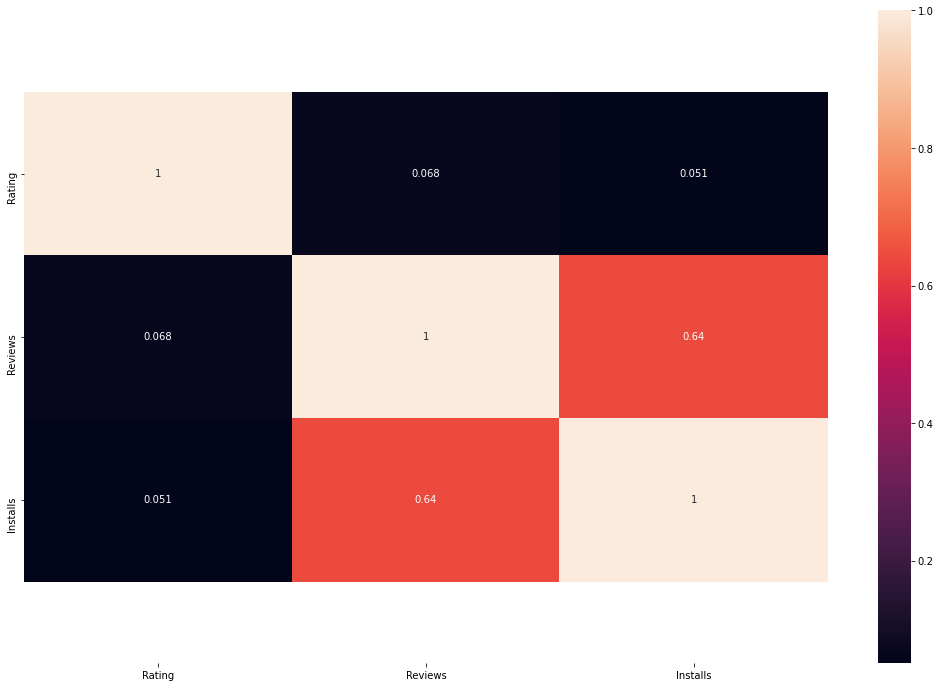

In [36]:
cor_df2 = df2.corr().nlargest(50, 'Rating')['Rating'].index
f , ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(df2[cor_df2].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [37]:
print(df2.corr()) #Correlation analysis 

            Rating   Reviews  Installs
Rating    1.000000  0.068133  0.051337
Reviews   0.068133  1.000000  0.641605
Installs  0.051337  0.641605  1.000000


# 5.2 Dropping strongly correlated variables in order to avoid confounding effects

In [38]:
# Correlation matrix
corr_matrix = df2.corr().abs()

In [39]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [40]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [41]:
to_drop

[]


Multicolinearity assumption was met!

Text(0.5, 1.0, 'TOTAL apps in each category')

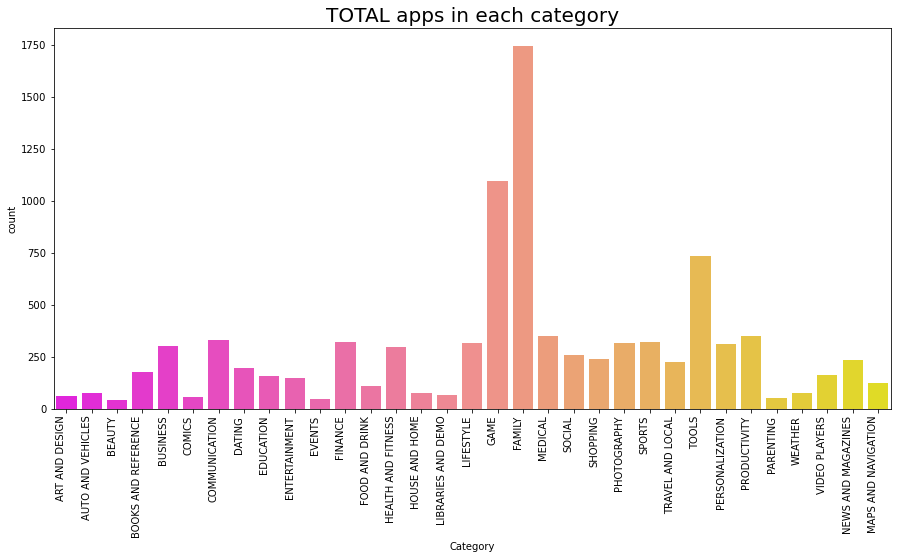

In [43]:
# Data visualization
rcParams['figure.figsize'] = 15,7
category_plot = sns.countplot(x="Category",data=df2, palette = "spring")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot 
plt.title('TOTAL apps in each category',size = 20)


It can be seen in the above graph, that the most popular App category is Family, and the least popular is the Evetns Category. Amongst the most popular are Games, Medical, tools and photography.

Text(0.5, 1.0, 'Content Rating distribution')

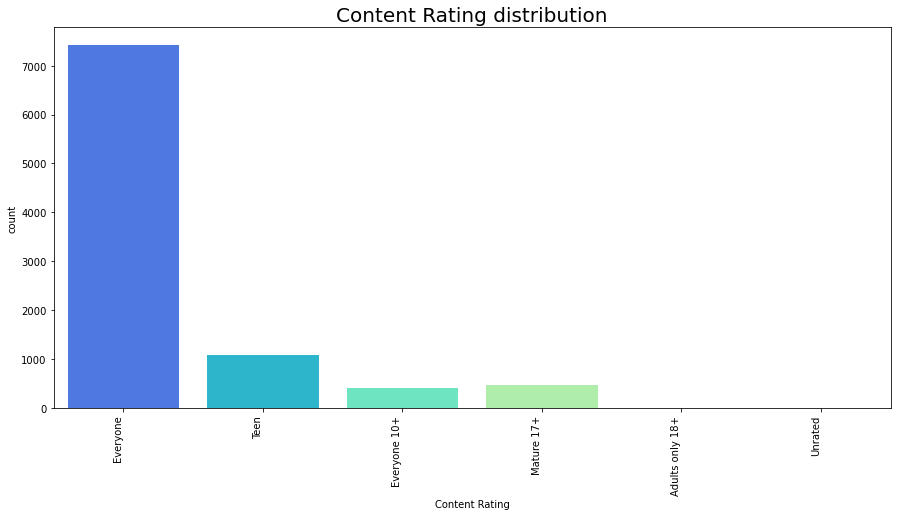

In [44]:
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=df2, palette = "rainbow")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)


Everyone, Teen Content Rating comprise the majority of ratings across all apps. Conversely, Unrated and Adults ony 18+ have account of the least amounts of ratings.

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

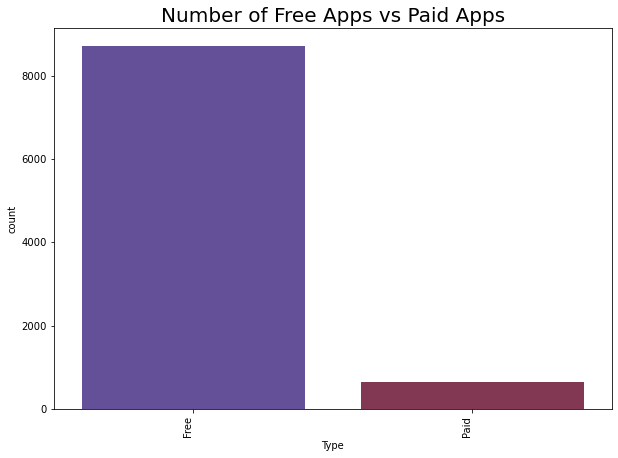

In [45]:
rcParams['figure.figsize'] = 10,7
type_plot = sns.countplot(x="Type", data=df2, palette = "twilight")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)


There is clear difference between the number of paid and free of charge apps. The number of free apps totals up to 7588, whereas the number of paid apps sums up to 602.

Text(0.5, 1.0, 'Charge fees for paid apps')

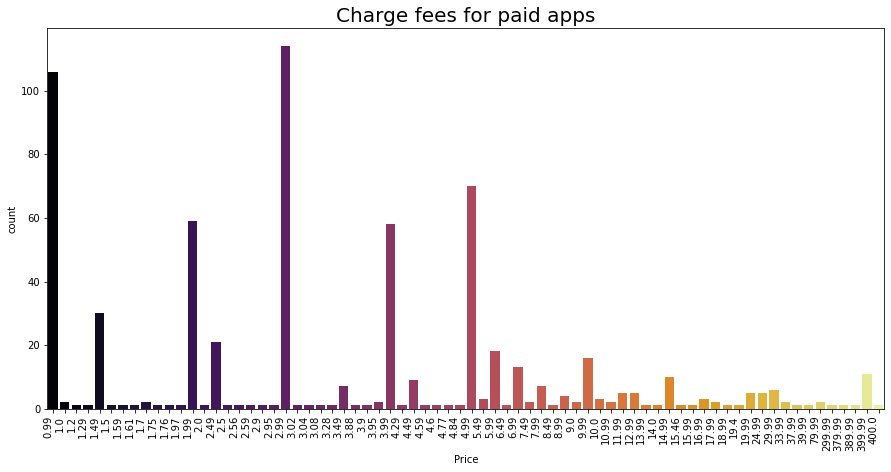

In [47]:
df2['Price'] = df2['Price'].apply(lambda x: float(x))
rcParams['figure.figsize'] = 15,7
priced_apps=df2[df2['Price'] != 0.0]
price_plot = sns.countplot(priced_apps['Price'], palette = "inferno")
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
price_plot 
plt.title('Charge fees for paid apps',size = 20)


The above graph contains information specific to the Paid Apps type. There is a clear preference in price chosen for the paid apps. They include: 0.99, 2.99, 4.99, 1.99, and 3.99 US Dollars.

Text(0.5, 1.0, 'Installs count distribution')

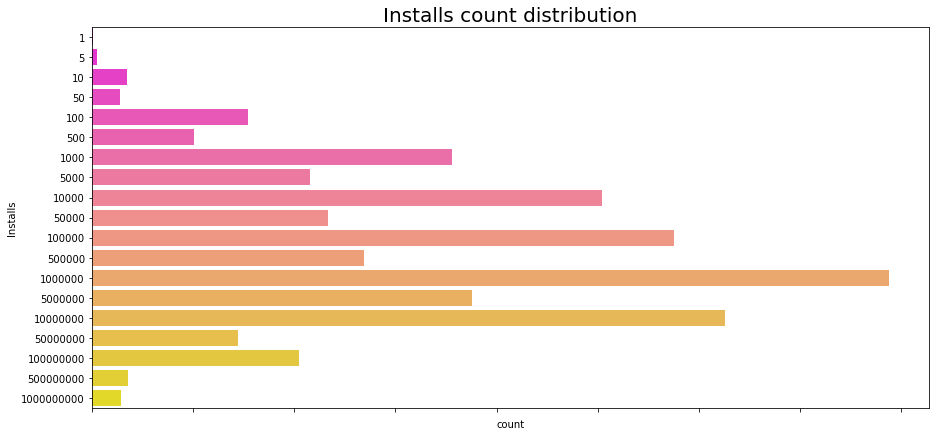

In [48]:
rcParams['figure.figsize'] = 15,7
install_plot = sns.countplot(y="Installs",data=df2, palette = "spring")
install_plot.set_xticklabels(install_plot.get_xticklabels(), rotation=90, ha="right")
install_plot 
plt.title('Installs count distribution',size = 20)


Most of the apps in the dataframe have 1 million installs followed by 10 million and 100k.

Text(0.5, 1.0, 'Rating Distribution')

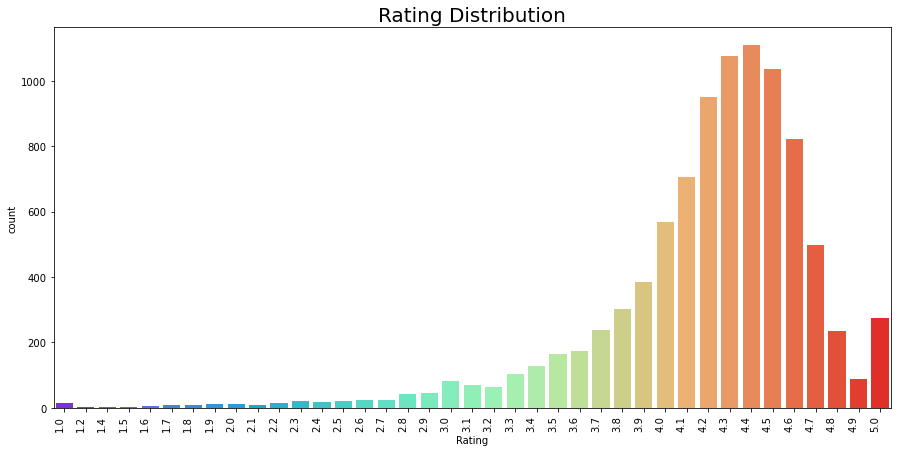

In [49]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="Rating",data=df2, palette = "rainbow")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Rating Distribution',size = 20)


The Ratings distribution skewed to the left, with most of the apps are rated between 4.0 and 4.7.

Text(0.5, 1.0, 'Most Reviewed Apps at Google Play Store')

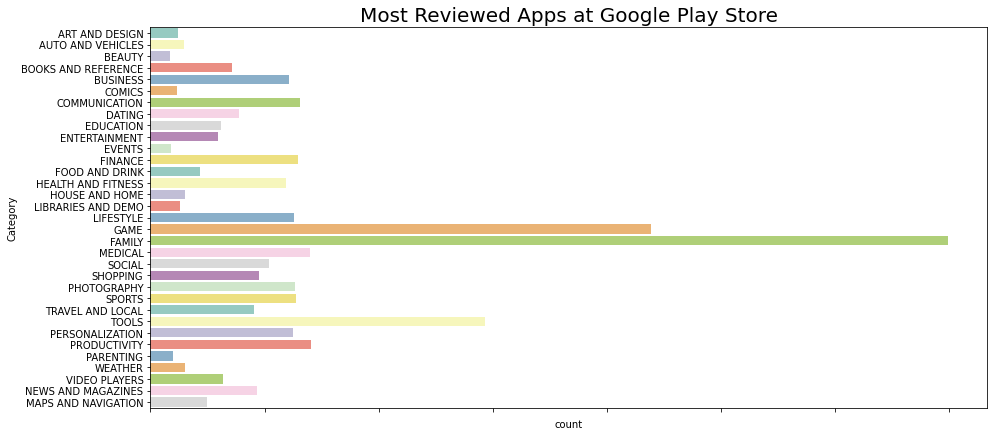

In [50]:
rcParams['figure.figsize'] = 15,7
likeable_apps = sns.countplot(y="Category",data=df2, palette = "Set3")
likeable_apps.set_xticklabels(likeable_apps.get_xticklabels(), rotation=90, ha="right")
likeable_apps 
plt.title('Most Reviewed Apps at Google Play Store',size = 20)


Most reviewed apps are int he following App Categories: Family, Game, Tools, Finance, Lide style and medical apps. 

# 6. Data Preparation

In [51]:
# drop target variable
X=df2_categorical.drop('Rating',axis=1)
y=df2_categorical['Rating'].values

In [52]:
X.shape, y.shape

((9360, 156), (9360,))

In [55]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# Train validation split
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=52)

# 7. Modelling

In [ ]:
# LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_train_val)# copy paste change train for validation 
lr_cm=confusion_matrix(y_train_val,lr_pred)
lr_ac=accuracy_score(y_train_val, lr_pred)
lr_pred=lr_c.predict(X_val)# copy paste change train for validation 
lr_cm=confusion_matrix(y_val,lr_pred)
lr_ac=accuracy_score(y__val, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [ ]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

In [ ]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

In [ ]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

# 7.1 Comparing Models

In [ ]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')